# Tarefa 2- Primeira rede densa com MNIST

## 1. Problema 

Identificar o dígito escrito na imagem.

## 2. Dados

As imagens são do data set MNIST

## 3. Avaliação

Olhar para LOSS e a Acurácia do treino e da validação.

Verificar se o dígito da imagem é lido corretamente.

## 4. Características

Getting MNIST Data Set

In [ ]:
!pip install mnist

# Setting Workspace

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mnist    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# Getting Data Ready

In [ ]:
# Training data (also validation data)
X_train = mnist.train_images()
y_train = mnist.train_labels()
# Test data
X_test = mnist.test_images()
y_test = mnist.test_labels()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# Normalize the images
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

# Flatten the images
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_test[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Splitting Data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                  random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

# Building the Model

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(784,)))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checkpoint: store the best model
checkpoint_model = 'tarefa2-weights-best.hdf5'
checkpoint = ModelCheckpoint(checkpoint_model,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks_list = [checkpoint]

In [ ]:
NB_EPOCHS = 20
BATCH_SIZE = 32

out = model.fit(X_train, y_train, 
          epochs=NB_EPOCHS, 
          batch_size=BATCH_SIZE,
          callbacks=callbacks_list,
          validation_data=(X_val, y_val), 
          verbose=0)


Epoch 00001: val_accuracy did not improve from 0.94500

Epoch 00002: val_accuracy did not improve from 0.94500

Epoch 00003: val_accuracy improved from 0.94500 to 0.94642, saving model to tarefa2-weights-best.hdf5

Epoch 00004: val_accuracy improved from 0.94642 to 0.94925, saving model to tarefa2-weights-best.hdf5

Epoch 00005: val_accuracy did not improve from 0.94925

Epoch 00006: val_accuracy did not improve from 0.94925

Epoch 00007: val_accuracy did not improve from 0.94925

Epoch 00008: val_accuracy did not improve from 0.94925

Epoch 00009: val_accuracy did not improve from 0.94925

Epoch 00010: val_accuracy did not improve from 0.94925

Epoch 00011: val_accuracy did not improve from 0.94925

Epoch 00012: val_accuracy improved from 0.94925 to 0.95125, saving model to tarefa2-weights-best.hdf5

Epoch 00013: val_accuracy improved from 0.95125 to 0.95325, saving model to tarefa2-weights-best.hdf5

Epoch 00014: val_accuracy did not improve from 0.95325

Epoch 00015: val_accuracy d

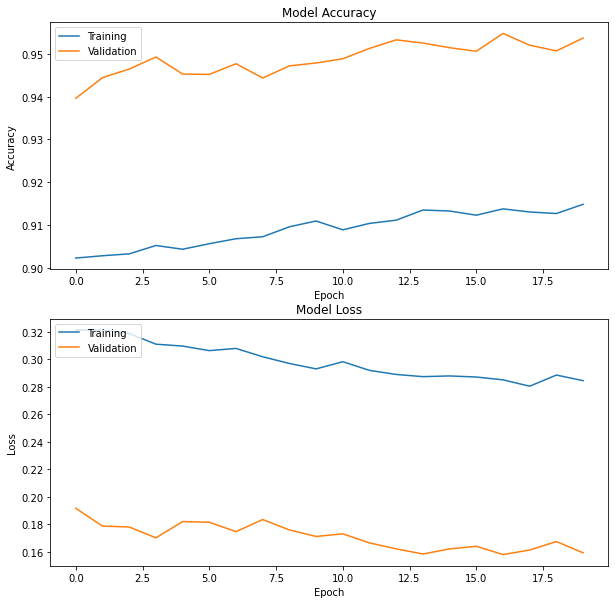

In [ ]:
fig, ([ax0, ax1]) = plt.subplots(nrows=2, 
                                ncols=1,
                                figsize=(10,10))

# Add data to ax0
ax0.plot(out.history["accuracy"])
ax0.plot(out.history["val_accuracy"])
# Change the y axis limits
#ax2.set_ylim([0.6, 0.9])
# Customize ax0
ax0.set(title="Model Accuracy",
        xlabel="Epoch",
        ylabel="Accuracy");
# Add a legend to ax0
ax0.legend(["Training", "Validation"], loc="upper left");

# Add data to ax1
ax1.plot(out.history["loss"])
ax1.plot(out.history["val_loss"])
# Change the y axis limits
#ax1.set_ylim([0.6, 0.9])
# Customize ax0
ax1.set(title="Model Loss",
        xlabel="Epoch",
        ylabel="Loss");
# Add a legend to ax0
ax1.legend(["Training", "Validation"], loc="upper left");

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('Test loss = ',score[0],'\nTest accuracy = ',score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1605 - accuracy: 0.9534
Test loss =  0.16046246886253357 
Test accuracy =  0.9534000158309937


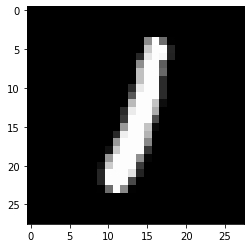

[8.4942758e-07 9.9355906e-01 6.7582855e-04 2.6093770e-04 4.0876730e-05
 4.0779814e-05 1.2325001e-04 8.9829933e-05 5.1985416e-03 9.9899316e-06]
Model digit prediction: 1


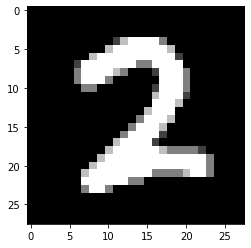

[6.0912477e-14 3.5738105e-07 9.9846196e-01 1.2730062e-03 1.5076324e-21
 1.2038643e-09 7.8538061e-24 2.6364360e-04 1.1159145e-06 2.5611414e-18]
Model digit prediction: 2


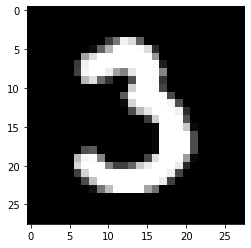

[1.0415457e-22 7.1814532e-10 1.0380045e-09 9.9999499e-01 1.3281210e-18
 5.0073422e-06 1.3373187e-24 1.2764337e-09 7.8152840e-10 1.4380780e-10]
Model digit prediction: 3


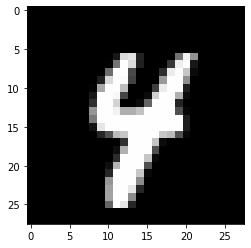

[2.2184503e-08 4.5367784e-08 4.6135061e-05 1.9423974e-06 9.9986923e-01
 5.0833961e-07 3.7086632e-08 5.3144340e-05 1.7041639e-07 2.8798564e-05]
Model digit prediction: 4


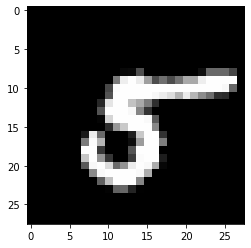

[1.1134288e-05 3.3087336e-08 1.8100977e-06 2.7594786e-05 1.9901347e-05
 9.9827921e-01 2.0670211e-06 7.5277990e-07 1.6463982e-03 1.1181161e-05]
Model digit prediction: 5


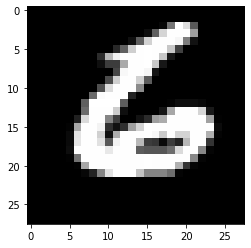

[5.3915994e-07 3.1041333e-16 8.1471931e-05 5.0189787e-08 7.9065949e-06
 2.8412398e-06 9.9990726e-01 1.3665511e-13 1.5177054e-10 1.0042250e-11]
Model digit prediction: 6


In [ ]:
# Predict single images
nb_images = 6
# Get images from test set
#X_to_predict = X_test[:nb_images]
X_to_predict = X_test[-nb_images:]
# Predicts
# Use the model to predict the images class
y_preds = list(model.predict_proba(X_to_predict))

# Display
for i in range(nb_images):
    plt.imshow(np.reshape(X_to_predict[i], [28, 28]), cmap='gray')
    plt.show()
    output=np.where(y_preds[i]==y_preds[i].max())
    print(y_preds[i])
    print("Model digit prediction:", output[0][0])

#pause()